In [7]:
import numpy as np 
import pandas as pd
import re
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import transformers
from transformers import pipeline
 

In [9]:
data = pd.read_csv(r"C:\Users\Yashraj rai\Downloads\book_reviews_sample (1).csv")
data

,index,reviewText,rating
0,11494,Clean and funny. A bit busy with all the diffe...,3
1,984,Alex a sexy hot cop and the PhD candidate. Wha...,4
2,1463,Good thing that this is a free story. I read i...,1
3,10342,"Action, action, action! Equipment keeps gettin...",4
4,5256,this was hands down the worse book i have ever...,1
...,...,...,...
95,1794,Love this author. I have read most of her book...,5
96,6716,This book was not bad! I like the storyline ! ...,2
97,7372,This is part of a series I read and I loved th...,5
98,5676,Finally a Texas newspaper in Kindle format.Way...,4


In [10]:
data.head()

,index,reviewText,rating
0,11494,Clean and funny. A bit busy with all the diffe...,3
1,984,Alex a sexy hot cop and the PhD candidate. Wha...,4
2,1463,Good thing that this is a free story. I read i...,1
3,10342,"Action, action, action! Equipment keeps gettin...",4
4,5256,this was hands down the worse book i have ever...,1


In [ ]:
data['reviewText'][0]

# for removing puntuation 

In [12]:
data['reviewclean']=data.apply(lambda x:re.sub(r"([^\w\s])","",x['reviewText'].lower()),axis=1 )

In [13]:
data['reviewclean']

0     clean and funny a bit busy with all the differ...
1     alex a sexy hot cop and the phd candidate what...
2     good thing that this is a free story i read it...
3     action action action equipment keeps getting b...
4     this was hands down the worse book i have ever...
                            ...                        
95    love this author i have read most of her books...
96    this book was not bad i like the storyline  th...
97    this is part of a series i read and i loved th...
98    finally a texas newspaper in kindle formatway ...
99    tj and jon are very hot in this book  christin...
Name: reviewclean, Length: 100, dtype: object

In [14]:
data.head()

,index,reviewText,rating,reviewclean
0,11494,Clean and funny. A bit busy with all the diffe...,3,clean and funny a bit busy with all the differ...
1,984,Alex a sexy hot cop and the PhD candidate. Wha...,4,alex a sexy hot cop and the phd candidate what...
2,1463,Good thing that this is a free story. I read i...,1,good thing that this is a free story i read it...
3,10342,"Action, action, action! Equipment keeps gettin...",4,action action action equipment keeps getting b...
4,5256,this was hands down the worse book i have ever...,1,this was hands down the worse book i have ever...


In [15]:
vader_sentiment = SentimentIntensityAnalyzer()


In [17]:
data['sentiment_score']=data['reviewclean'].apply(lambda review:vader_sentiment.polarity_scores(review)['compound'])

In [18]:
data.head()

,index,reviewText,rating,reviewclean,sentiment_score
0,11494,Clean and funny. A bit busy with all the diffe...,3,clean and funny a bit busy with all the differ...,0.7684
1,984,Alex a sexy hot cop and the PhD candidate. Wha...,4,alex a sexy hot cop and the phd candidate what...,0.9325
2,1463,Good thing that this is a free story. I read i...,1,good thing that this is a free story i read it...,0.6740
3,10342,"Action, action, action! Equipment keeps gettin...",4,action action action equipment keeps getting b...,0.6652
4,5256,this was hands down the worse book i have ever...,1,this was hands down the worse book i have ever...,-0.4767


In [19]:
bins=[-1,-0.1,0.1,1]
names = ['negative','neutral','positive']
data['label']=pd.cut(data['sentiment_score'],bins,labels=names)

<Axes: xlabel='label'>

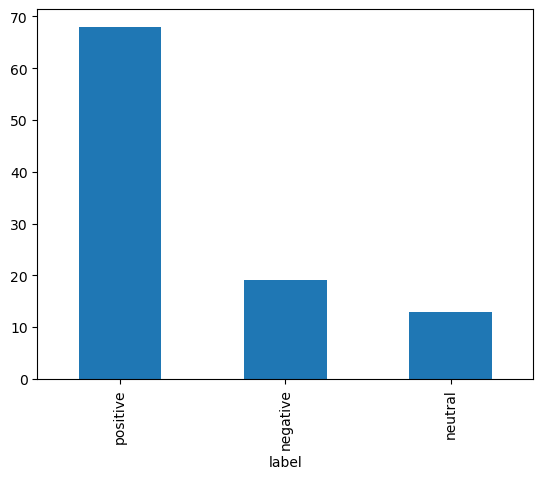

In [22]:
data['label'].value_counts().plot.bar()

In [24]:
transformer_pip= pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

C:\jupiter\envs\nlp_course_env\Lib\site-packages\huggingface_hub\file_download.py:143: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\Yashraj rai\.cache\huggingface\hub\models--distilbert--distilbert-base-uncased-finetuned-sst-2-english. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)
Xet Storage is enabled for this repo, but the 'hf_xet' package is not ins

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

Device set to use cpu


In [27]:
transformer_labels=[]
for review in data['reviewclean'].values:
    sentiment_list = transformer_pip(review)
    sentiment_label=[sent['label']for sent in sentiment_list]
    transformer_labels.append(sentiment_label)
    

In [28]:
data['transformer_sentiment_label']=transformer_labels


<Axes: xlabel='transformer_sentiment_label'>

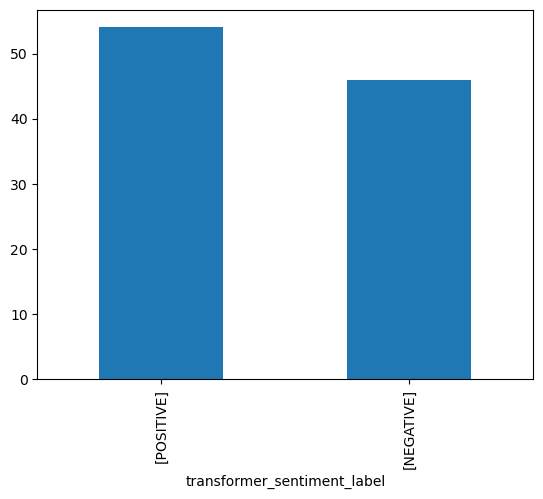

In [29]:
data['transformer_sentiment_label'].value_counts().plot.bar()